<a href="https://colab.research.google.com/github/GEMajlis/sklearn_models/blob/main/SpamEmailsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

gonzalomajlis

874446b4701da0dfda59592739a92619

In [1]:
import pandas as pd

In [2]:
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/noeyislearning/spam-emails")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: gonzalomajlis
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/noeyislearning/spam-emails


100%|██████████| 2.86M/2.86M [00:00<00:00, 150MB/s]

In [3]:
df = pd.read_csv('/content/spam-emails/emails.csv')

In [4]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [5]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [6]:
df.columns

Index(['text', 'spam'], dtype='object')

In [7]:
X = df['text']
y = df['spam']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.2)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
pipeline = Pipeline([
            ('tfidf', TfidfVectorizer(
                max_features=5000,
                stop_words='english',
                lowercase=True,
                strip_accents='unicode'
            )),
            ('classifier', LogisticRegression(
                C=1.0,
                class_weight='balanced',
                max_iter=1000,
                random_state=42
            ))
        ])

In [13]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, stop_words='english',
                                 strip_accents='unicode')),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [14]:
pipeline.score(X_test, y_test)

0.9912739965095986

In [15]:
from sklearn.metrics import classification_report

In [16]:
print(classification_report(y_test, pipeline.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       861
           1       0.97      1.00      0.98       285

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



***Example***

In [17]:
new_emails = ['Get rich quick! Click here!',
 'Meeting tomorrow at 10am about the project']

In [18]:
prediccion = pipeline.predict(new_emails)

In [19]:
probabilities = pipeline.predict_proba(new_emails)

In [20]:
for email, prediction, probs in zip(new_emails, prediccion, probabilities):
  print(f'Email: {email}')
  print(f'Prediction: {"spam" if prediction == 1 else "no spam"}')
  print(f'probabilidades de spam: {probs[1]:.2f}')

Email: Get rich quick! Click here!
Prediction: spam
probabilidades de spam: 0.84
Email: Meeting tomorrow at 10am about the project
Prediction: no spam
probabilidades de spam: 0.11


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [22]:
y_pred = pipeline.predict(X_test)

Text(33.22222222222222, 0.5, 'Predicted')

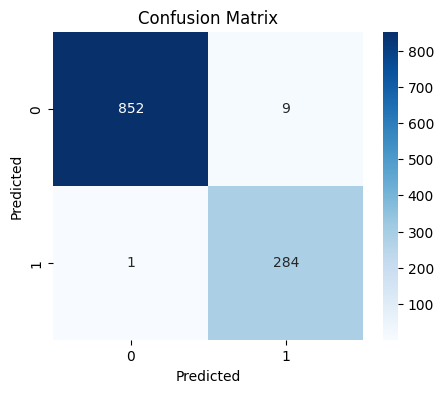

In [28]:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
map = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
map.set_title('Confusion Matrix')
map.set_xlabel('Predicted')
map.set_ylabel('Predicted')
